#### Katrina Johnson - DSB Unit 2.4.4 

## Challenge: Make Your Own Regression Model

Now that you've spent some time playing with a sample multivariate linear regression model, it's time to make your own.

You've already gotten started by prepping the FBI:UCR Crime dataset (Thinkful mirror) in a previous assignment.

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [37]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [38]:
df.iloc[3]

Table 8                                          City
Unnamed: 1                                 Population
Unnamed: 2                             Violent\ncrime
Unnamed: 3     Murder and\nnonnegligent\nmanslaughter
Unnamed: 4               Rape\n(revised\ndefinition)1
Unnamed: 5                Rape\n(legacy\ndefinition)2
Unnamed: 6                                    Robbery
Unnamed: 7                        Aggravated\nassault
Unnamed: 8                            Property\ncrime
Unnamed: 9                                   Burglary
Unnamed: 10                           Larceny-\ntheft
Unnamed: 11                     Motor\nvehicle\ntheft
Unnamed: 12                                    Arson3
Name: 3, dtype: object

In [39]:
df.columns = ['City', 'Population', 'Violent crime', 'Murder and non negligent manslaughter', 'Rape (revised definition) 1',
              'Rape (legacy definition) 2', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny theft', 
              'Motor vehicle theft', 'Arson 3']

df

,City,Population,Violent crime,Murder and non negligent manslaughter,Rape (revised definition) 1,Rape (legacy definition) 2,Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson 3
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [40]:
df = df.drop(0)
df = df.drop(1)
df = df.drop(2)
df = df.drop(3)
df = df.drop(352)
df = df.drop(353)
df = df.drop(354)

df

,City,Population,Violent crime,Murder and non negligent manslaughter,Rape (revised definition) 1,Rape (legacy definition) 2,Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson 3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1
13,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0


#df.findall({NaN}).any(axis=1).sum()
index = df['Rape (revised definition) 1'].index[df['Rape (revised definition) 1'].apply(np.isnan)]
index

In [41]:
df = df.replace({None: ''})

df

,City,Population,Violent crime,Murder and non negligent manslaughter,Rape (revised definition) 1,Rape (legacy definition) 2,Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson 3
4,Adams Village,1861,0,0,,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,,30,227,526,4090,705,3243,142,
8,Albion Village,6388,23,0,,3,4,16,223,53,165,5,
9,Alfred Village,4089,5,0,,0,3,2,46,10,36,0,
10,Allegany Village,1781,3,0,,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,,2,4,3,210,16,188,6,1
13,Amsterdam,18182,30,0,,0,12,18,405,99,291,15,0


In [42]:
#df.insert(6, 'Robbery binary', '')
#df.insert(10, 'Burglary binary', '')

#df

In [43]:
robbery_binary = []
x = df.loc[df['Robbery']]
#Note: for loops do not need a return at the end. Only functions need to end with a return statement.

for item in df.Robbery:
    if item > 0:
        robbery_binary.append(1)
    else: 
        robbery_binary.append(0)
        
print(robbery_binary)
    


[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [44]:
#I can now take the list robbery_binary and append it to df['Robbery binary']
df.insert(6, 'Robbery binary', robbery_binary)
df

,City,Population,Violent crime,Murder and non negligent manslaughter,Rape (revised definition) 1,Rape (legacy definition) 2,Robbery binary,Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson 3
4,Adams Village,1861,0,0,,0,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,,0,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,,0,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,,30,1,227,526,4090,705,3243,142,
8,Albion Village,6388,23,0,,3,1,4,16,223,53,165,5,
9,Alfred Village,4089,5,0,,0,1,3,2,46,10,36,0,
10,Allegany Village,1781,3,0,,0,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,,7,1,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,,2,1,4,3,210,16,188,6,1
13,Amsterdam,18182,30,0,,0,1,12,18,405,99,291,15,0


In [45]:
burglary_binary = []
x = df.loc[df['Burglary']]
#Note: for loops do not need a return at the end. Only functions need to end with a return statement.

for item in df.Burglary:
    if item > 0:
        burglary_binary.append(1)
    else: 
        burglary_binary.append(0)
        
print(burglary_binary)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [46]:
#I can now take the list robbery_binary and append it to df['Robbery binary']
df.insert(10, 'Burglary binary', burglary_binary)
df

,City,Population,Violent crime,Murder and non negligent manslaughter,Rape (revised definition) 1,Rape (legacy definition) 2,Robbery binary,Robbery,Aggravated assault,Property crime,Burglary binary,Burglary,Larceny theft,Motor vehicle theft,Arson 3
4,Adams Village,1861,0,0,,0,0,0,0,12,1,2,10,0,0
5,Addison Town and Village,2577,3,0,,0,0,0,3,24,1,3,20,1,0
6,Akron Village,2846,3,0,,0,0,0,3,16,1,1,15,0,0
7,Albany,97956,791,8,,30,1,227,526,4090,1,705,3243,142,
8,Albion Village,6388,23,0,,3,1,4,16,223,1,53,165,5,
9,Alfred Village,4089,5,0,,0,1,3,2,46,1,10,36,0,
10,Allegany Village,1781,3,0,,0,0,0,3,10,0,0,10,0,0
11,Amherst Town,118296,107,1,,7,1,31,68,2118,1,204,1882,32,3
12,Amityville Village,9519,9,0,,2,1,4,3,210,1,16,188,6,1
13,Amsterdam,18182,30,0,,0,1,12,18,405,1,99,291,15,0


## This code does not work.  Why?

robberies_binary = df['Robbery']
for item in robberies_binary:
    if item > 0:
        df['Robbery binary'] = 1
    elif item == 0:
        df['Robbery binary'] = 0

## This is a more elegent solution for converting df['Robbery'] to a series of binary values:

df['Robbery binary'] = df['Robbery'].apply(lambda x: 1 if x > 0 else 0)

df

In [47]:
df['Population Square'] = np.square(df['Population'])

In [48]:
df

,City,Population,Violent crime,Murder and non negligent manslaughter,Rape (revised definition) 1,Rape (legacy definition) 2,Robbery binary,Robbery,Aggravated assault,Property crime,Burglary binary,Burglary,Larceny theft,Motor vehicle theft,Arson 3,Population Square
4,Adams Village,1861,0,0,,0,0,0,0,12,1,2,10,0,0,3463321
5,Addison Town and Village,2577,3,0,,0,0,0,3,24,1,3,20,1,0,6640929
6,Akron Village,2846,3,0,,0,0,0,3,16,1,1,15,0,0,8099716
7,Albany,97956,791,8,,30,1,227,526,4090,1,705,3243,142,,9595377936
8,Albion Village,6388,23,0,,3,1,4,16,223,1,53,165,5,,40806544
9,Alfred Village,4089,5,0,,0,1,3,2,46,1,10,36,0,,16719921
10,Allegany Village,1781,3,0,,0,0,0,3,10,0,0,10,0,0,3171961
11,Amherst Town,118296,107,1,,7,1,31,68,2118,1,204,1882,32,3,13993943616
12,Amityville Village,9519,9,0,,2,1,4,3,210,1,16,188,6,1,90611361
13,Amsterdam,18182,30,0,,0,1,12,18,405,1,99,291,15,0,330585124


#### ?Scale the non-binary features, so that each hopefully has a 0 mean.

#### ?Find the scaled std (i.e. standard deviation) of each feature.

import seaborn as sns
corr = dataframe.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

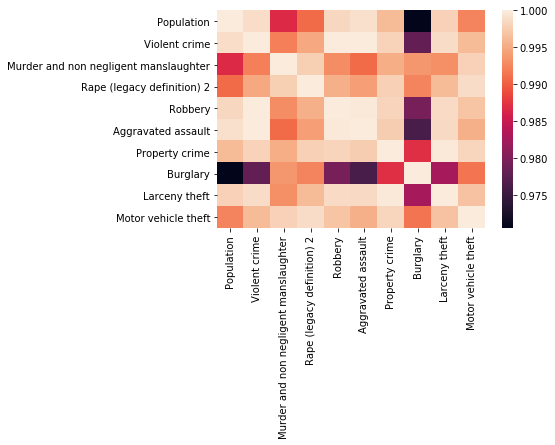

In [49]:
#Example: df.drop(columns=['B', 'C'])

df = df.drop(columns=['Robbery binary', 'Burglary binary', 'Population Square'])
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

Property Crimes:
    Robbery
    Burglary
    Larceny theft
    Motor vehicle theft
    
Features that (according to the heat map figures above) have a strong correlation with one or more fo the above features:

    Robbery -> top 4 correlates listed highest to lowest ->  Violent crime, Aggrevated assault, Larceny theft/Population
    
    Burglary -> top 4 correlates listed highest to lowest -> murder and non neglegent manslaughter, Rape (legacy definition) 2, Motor vehicle theft, Property crime
    
    Larceny theft -> top 4 correlates listed highest to lowest -> Property crime, Aggrevated assault/Robbery/Violent crime
    
    Motor vehicle theft -> top 6 correlates listed highest to lowest -> Rape (legacy definition) 2, murder and non neglegent manslaughter/Property crime, Violent crime/Robbery/Larceny theft
    
### Before doing the step in the bloc below: Divide every feature by the population, in order to normalize this data set.  This allows for explanations to be presented in a per capita basis.
Go to applymap documentation
make a lambda function that says for this column, divide this column by the population column.
Practice doing it for one column for example data['Burglary'] to find out whether or not it works.

data['Burglary'] = data['Burglary'] / data['Population']



# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

#Example of how to use the applymap function, and how to write a lambda function.
df.applymap(lambda x: len(str(x)))

In [50]:
df.columns

Index(['City', 'Population', 'Violent crime',
       'Murder and non negligent manslaughter', 'Rape (revised definition) 1',
       'Rape (legacy definition) 2', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft',
       'Arson 3'],
      dtype='object')

In [51]:
df.describe

<bound method NDFrame.describe of                            City  Population  Violent crime  \
4                 Adams Village        1861              0   
5      Addison Town and Village        2577              3   
6                 Akron Village        2846              3   
7                        Albany       97956            791   
8                Albion Village        6388             23   
9                Alfred Village        4089              5   
10             Allegany Village        1781              3   
11                 Amherst Town      118296            107   
12           Amityville Village        9519              9   
13                    Amsterdam       18182             30   
14               Arcade Village        2053              0   
15              Ardsley Village        4523              5   
16            Asharoken Village         658              0   
17               Attica Village        2522              2   
18                       Auburn     

In [52]:
df['Burglary']

4        2
5        3
6        1
7      705
8       53
9       10
10       0
11     204
12      16
13      99
14       3
15       4
16       0
17       0
18     132
19       3
20      10
21      16
22     103
23      32
24      26
25      50
26     525
27       2
28      20
29       2
30       4
31       6
32       9
33       3
      ... 
322     22
323      0
324     25
325    449
326     39
327     13
328     91
329     18
330      5
331      5
332      6
333     23
334    169
335     58
336     10
337      9
338    101
339      5
340     32
341      4
342    166
343     12
344     77
345     14
346     13
347      9
348      8
349     13
350    470
351     45
Name: Burglary, Length: 348, dtype: int64

In [53]:

df = df.drop(['Rape (revised definition) 1'], axis=1)
#df

In [54]:
df = df.drop(['City'], axis=1)

In [55]:
df.columns

Index(['Population', 'Violent crime', 'Murder and non negligent manslaughter',
       'Rape (legacy definition) 2', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft',
       'Arson 3'],
      dtype='object')


#Nice example of a lambda function. Not sure whether or not it works.
#df.loc[df['Rape (revised definition) 1'].apply(lambda x: x == int(x))]


lambda x: ((for x in df): x/ 'Population').

In [66]:
m = df['Population']
k = df
def divide_by_pop(m, k):
    for pop in m:
        for elem in k:
            df.applymap(lambda x: x == pop/elem)
    returm k

SyntaxError: invalid syntax (<ipython-input-66-cdb6ebb9eae4>, line 7)